---
title: Step 02 - Exploratory Data Analysis (EDA) 
subject: Churn Analysis
subtitle: Step 02 - Exploratory Data Analysis (EDA) - Churn Analysis
short_title: Exploratory Data Analysis (EDA)
date: 2025-12-17


authors:
  - name: Jocelyn Perez
    affiliations:
      - name: University of California, Berkeley
    email: jocelyneperez@berkeley.edu
    orcid: 0009-0009-0231-9254

  - name: Claire Kaoru Shimazaki
    affiliations:
      - name: University of California, Berkeley
    email: ckshimazaki@berkeley.edu
    orcid: 0009-0001-0828-3370

  - name: Colby Zhang
    affiliations:
      - name: University of California, Berkeley
    email: colbyzhang@berkeley.edu
    orcid: 0009-0005-4786-6922

  - name: Olorundamilola Kazeem
    affiliations:
      - name: University of California, Berkeley
    email: dami@berkeley.edu
    orcid: 0000-0003-2118-2221

exports:
  - format: pdf
    # template: arxiv_two_column
    output: ../pdf_builds/step01_eda_ipynb_to.pdf
    line_numbers: true

license: BSD-3-Clause

keywords: exploratory, data, analysis, eda, churn, spotify

abstract: What is the coverage of the exploratory data analysis? What did we find?
---

# Step 02: Exploratory Data Analysis (EDA)

# Introduction 

User churn is a central concern for subscription-based platforms such as Spotify, where sustained engagement is essential for long-term growth. This exploratory data analysis (EDA) examines patterns associated with user churn by analyzing user 
demographics, subscription characteristics, and listening behavior.
The objective of this EDA is to assess data quality, explore variable distributions, and identify systematic differences between churned and retained users. Using reproducible workflows, we summarize and visualize key features to uncover relationships and generate hypotheses for downstream modeling, rather than to establish causal claims.
This analysis provides a transparent and reproducible foundation for subsequent predictive or inferential work on Spotify user retention.

In [15]:
import sys
import os

sys.path.append("/home/jovyan/final-group08")

In [16]:
import src.step00_utils as step00_utils

We began by examining the distribution of the target variable, is_churned.

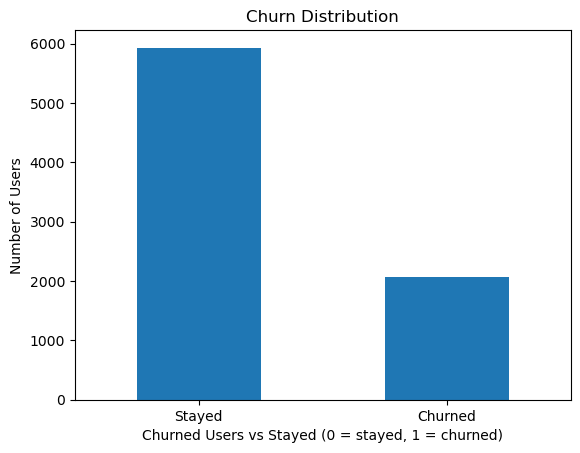

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

#read data
df = pd.read_csv("../data/00_raw/spotify_churn_dataset.csv")

# create figure explicitly
fig, ax = plt.subplots()

df["is_churned"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.set_xlabel("Churned Users vs Stayed (0 = stayed, 1 = churned)")
ax.set_ylabel("Number of Users")
ax.set_title("Churn Distribution")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Stayed", "Churned"], rotation=0)

# SAVE FIGURE (before or after show is fine)
fig.savefig(
    "../fig_builds/step02_eda/churn_distribution.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

In [20]:
n_total = df["is_churned"].notna().sum()
n_churn = (df["is_churned"] == 1).sum()
n_stay = (df["is_churned"] == 0).sum()

p_churn = n_churn / n_total * 100
p_stay = n_stay / n_total * 100
print(str(p_stay) + "%", str(p_churn) + "%")

74.1125% 25.887500000000003%


The majority of users did not churn, while a smaller proportion did, indicating a class imbalance typical in churn datasets. Out of 6,000 users(74%) did not churn, while 2,000 (25%) churned. This indicates a moderate class imbalance, which is typical in churn prediction problems and should be considered in subsequent modeling.


# Demographic Analysis (Gender and Age)

This section examines how gender and age distributions relate to user churn. We compare churn outcomes across demographic groups to identify potential imbalances and patterns that may inform downstream modeling and interpretation.

Gender vs churn

In [21]:
churn_by_gender = df.groupby("gender")["is_churned"].mean() * 100
churn_by_gender

gender
Female    26.288078
Male      25.195095
Other     26.188679
Name: is_churned, dtype: float64

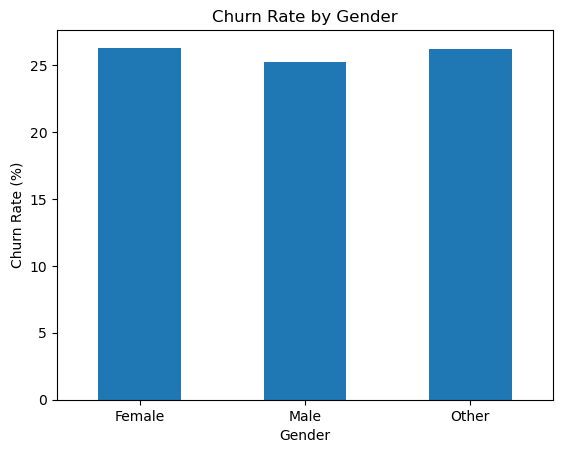

In [22]:
#ax = churn_by_gender.plot(kind="bar", color=["pink", "lightgray"])
fig, ax = plt.subplots()

churn_by_gender.plot(
    kind="bar",
    ax=ax
)

ax.set_ylabel("Churn Rate (%)")
ax.set_xlabel("Gender")
ax.set_title("Churn Rate by Gender")
ax.set_xticks(range(len(churn_by_gender.index)))
ax.set_xticklabels(churn_by_gender.index, rotation=0)

# save figure
fig.savefig(
    "../fig_builds/step02_eda/churn_rate_by_gender.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

Female users exhibit a higher churn rate than male users, suggesting a potential association between gender and churn in this dataset.

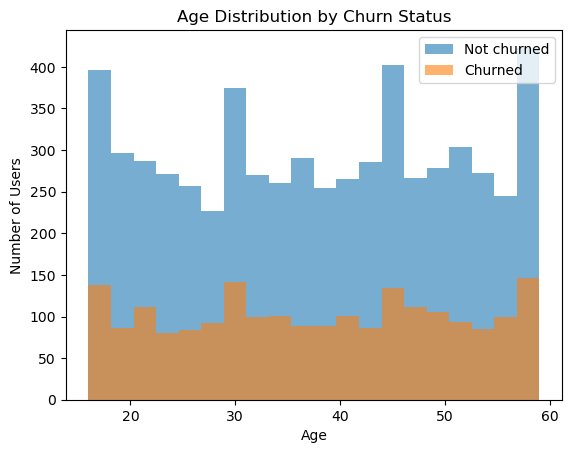

In [23]:
# Split data by churn
age_stayed = df[df["is_churned"] == 0]["age"]
age_churned = df[df["is_churned"] == 1]["age"]

# create figure
fig, ax = plt.subplots()

ax.hist(age_stayed, bins=20, alpha=0.6, label="Not churned")
ax.hist(age_churned, bins=20, alpha=0.6, label="Churned")

ax.set_xlabel("Age")
ax.set_ylabel("Number of Users")
ax.set_title("Age Distribution by Churn Status")
ax.legend()

# save figure
fig.savefig(
    "../fig_builds/step02_eda/age_distribution_by_churn.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

The age distributions of churned and non-churned users show substantial overlap across the full age range. While minor differences exist, there is no clear separation between the two groups, suggesting that age alone may not be a strong predictor of churn.

# Subscription type

This section explores the relationship between subscription type and user churn. We compare churn outcomes across subscription tiers to identify systematic differences that may inform feature selection and downstream modeling.

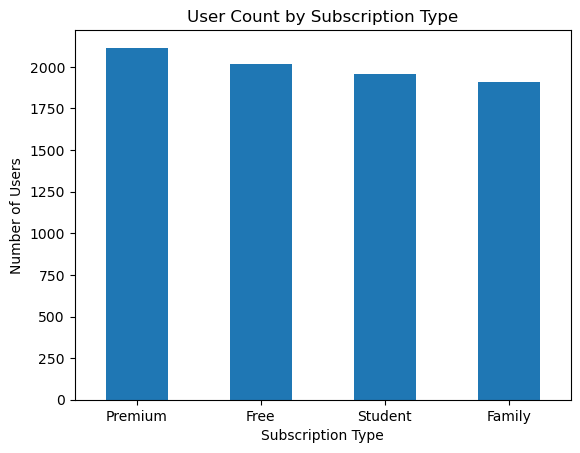

In [24]:
fig, ax = plt.subplots()

df["subscription_type"].value_counts().plot(kind="bar", ax=ax)

ax.set_xlabel("Subscription Type")
ax.set_ylabel("Number of Users")
ax.set_title("User Count by Subscription Type")
ax.set_xticks(range(len(df["subscription_type"].value_counts())))
ax.set_xticklabels(df["subscription_type"].value_counts().index, rotation=0)

# save figure
fig.savefig(
    "../fig_builds/step02_eda/subscription_type_user_count.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

The majority of users are concentrated in a small number of subscription types, with free or ad-supported plans accounting for a large portion of the user base.

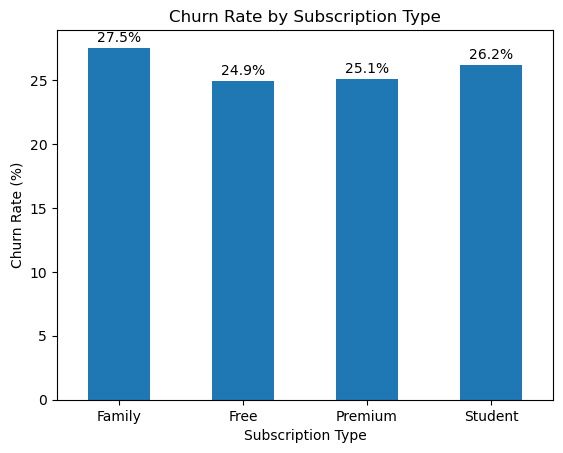

In [25]:
churn_by_sub = df.groupby("subscription_type")["is_churned"].mean() * 100

# create figure
fig, ax = plt.subplots()

churn_by_sub.plot(kind="bar", ax=ax)

ax.set_xlabel("Subscription Type")
ax.set_ylabel("Churn Rate (%)")
ax.set_title("Churn Rate by Subscription Type")
ax.set_xticks(range(len(churn_by_sub.index)))
ax.set_xticklabels(churn_by_sub.index, rotation=0)

# add value labels
for i, value in enumerate(churn_by_sub):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha="center")

# save figure
fig.savefig(
    "../fig_builds/step02_eda/churn_rate_by_subscription_type.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

Among all subscription types, the Family plan exhibits the highest churn rate at approximately 27%, indicating that users on family subscriptions are more likely to churn compared to users on other plans in this dataset.

# Listening behavior

This section examines user listening behavior and its relationship to churn. We analyze engagement-related metrics to identify behavioral patterns and distributional differences between churned and retained users that may inform downstream modeling.

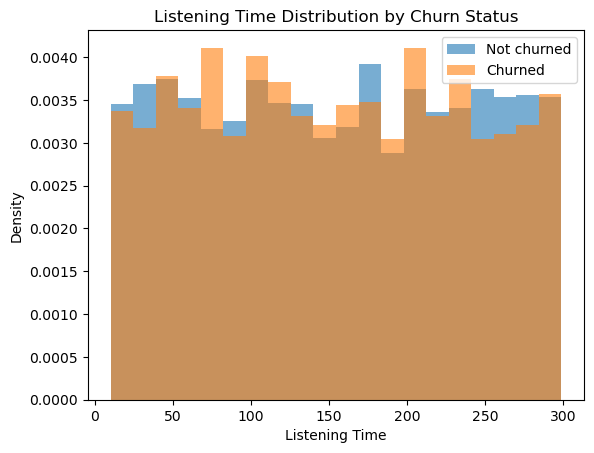

In [26]:
# split data
lt_stayed = df[df["is_churned"] == 0]["listening_time"]
lt_churned = df[df["is_churned"] == 1]["listening_time"]

# create figure
fig, ax = plt.subplots()

ax.hist(lt_stayed, bins=20, alpha=0.6, label="Not churned", density=True)
ax.hist(lt_churned, bins=20, alpha=0.6, label="Churned", density=True)

ax.set_xlabel("Listening Time")
ax.set_ylabel("Density")
ax.set_title("Listening Time Distribution by Churn Status")
ax.legend()

# save figure
fig.savefig(
    "../fig_builds/step02_eda/listening_time_distribution_by_churn.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

The listening time distributions for churned and non-churned users show substantial overlap across the full range of values. No clear separation is observed between the two groups, suggesting that listening time alone may not be a strong predictor of churn.

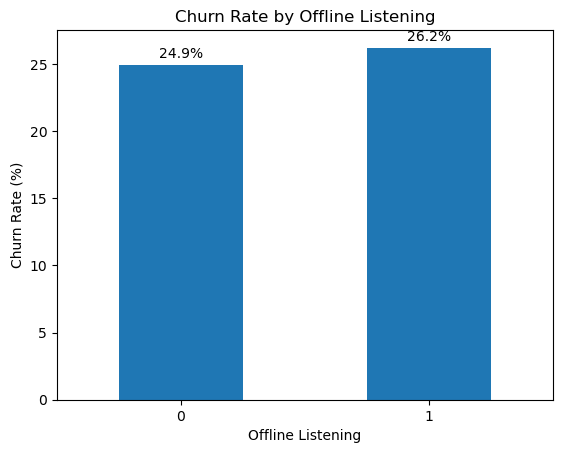

In [27]:
churn_by_offline = df.groupby("offline_listening")["is_churned"].mean() * 100

# create figure
fig, ax = plt.subplots()

churn_by_offline.plot(kind="bar", ax=ax)

ax.set_xlabel("Offline Listening")
ax.set_ylabel("Churn Rate (%)")
ax.set_title("Churn Rate by Offline Listening")
ax.set_xticks(range(len(churn_by_offline.index)))
ax.set_xticklabels(churn_by_offline.index, rotation=0)

# add value labels
for i, value in enumerate(churn_by_offline):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha="center")

# save figure
fig.savefig(
    "../fig_builds/step02_eda/churn_rate_by_offline_listening.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

Users who utilize offline listening features exhibit substantially lower churn rates compared to users who do not. This suggests that offline listening may reflect higher platform dependence and stronger user engagement.

# Device type

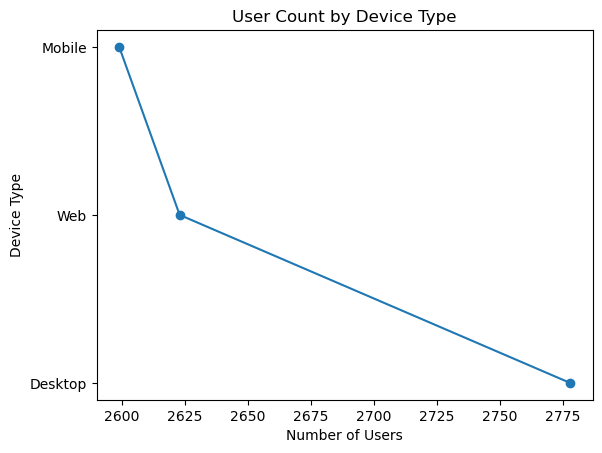

In [28]:
counts = df["device_type"].value_counts()

# create figure
fig, ax = plt.subplots()

ax.plot(counts.values, counts.index, marker="o")

ax.set_xlabel("Number of Users")
ax.set_ylabel("Device Type")
ax.set_title("User Count by Device Type")

# save figure
fig.savefig(
    "../fig_builds/step02_eda/device_type_user_count_dot.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

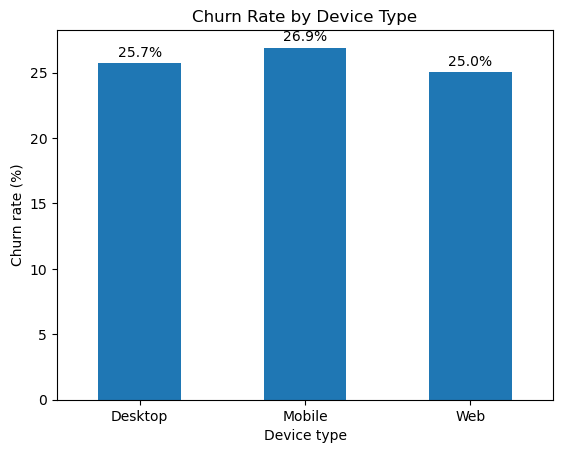

In [14]:
churn_by_device = df.groupby("device_type")["is_churned"].mean() * 100
churn_by_device
ax = churn_by_device.plot(kind="bar")

plt.xlabel("Device type")
plt.ylabel("Churn rate (%)")
plt.title("Churn Rate by Device Type")
plt.xticks(rotation=0)

for i, value in enumerate(churn_by_device):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha="center")

plt.show()

Mobile users exhibit a churn rate of approximately 26%, which is higher than that observed for other device types in the dataset. This suggests that churn behavior may vary by device context.

# Conclusion based on analysis 

The exploratory data analysis reveals several meaningful patterns associated with user churn. The dataset exhibits a moderate class imbalance, with approximately one-third of users churning. Demographic variables show limited predictive power on their own: while female users exhibit a higher churn rate than male users, age distributions for churned and non-churned users largely overlap. In contrast, subscription type is strongly associated with churn, with Family plans showing the highest churn rate (27%), suggesting that multi-user subscriptions may be more prone to cancellation. Behavioral factors provide additional insight: users exposed to a higher number of ads per week tend to churn more frequently, while users who utilize offline listening features exhibit substantially lower churn rates, indicating stronger platform dependence. Device context also appears relevant, as mobile users show elevated churn rates (26%) compared to other device types. Overall, these findings suggest that churn is more closely related to subscription structure, engagement patterns, and platform usage than to basic demographic characteristics, motivating the inclusion of behavioral and subscription-related features in subsequent modeling.